### iris dataset prediction via unsupervised learning

#### objective: split the iris dataset observations into well-separated group called clusters.

#### k-means: centroid based algorithm / distance-based algorithm, calculate the distances between points to assign a cluster

#### 1. import data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


iris dataset is reasonable to assume it's distributed according to Gaussian distributions.

#### 2. find optimal number of clusters for k-means

In [6]:
x = df.iloc[:, [0,1,2,3]].values
# look at the first array
print(x[0])

[5.1 3.5 1.4 0.2]


In [7]:
from sklearn.cluster import KMeans

#### a. use elbow method

In [12]:
wcss = []
for i in range(1,10):
    k = KMeans(n_clusters=i,
               init='k-means++',
               max_iter=300,
               n_init=10,
               random_state=0)
    k.fit(x)
    wcss.append(k.inertia_)

C:\Users\user\anaconda3\envs\virtualenv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


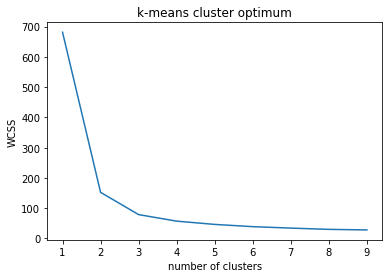

In [13]:
# plot graph
plt.figure(figsize=(6,4))
plt.plot(range(1,10), wcss)
plt.title('k-means cluster optimum')
plt.xlabel('number of clusters')
plt.ylabel('WCSS');

optimal clusters are formed where the elbow occurs. <br>
the best cluster is chosen when the WCSS (within cluster sum of squares) does not decrease with every iteration.

#### b. use silhouette coefficient score

In [17]:
# silhouette score use to calculate the goodness of clustering technique
# value from -1 to 1
from sklearn.metrics import silhouette_score

In [20]:
for n in range(2,11):
    kmeans = KMeans(n_clusters=n).fit(x)
    label = kmeans.labels_
    sil = silhouette_score(x, label, metric='euclidean')
    print("for n_clusters={}, silhouette coefficient is {}".format(n, sil))

for n_clusters=2, silhouette coefficient is 0.681046169211746
for n_clusters=3, silhouette coefficient is 0.5528190123564091
for n_clusters=4, silhouette coefficient is 0.49745518901737446
for n_clusters=5, silhouette coefficient is 0.4887488870931048
for n_clusters=6, silhouette coefficient is 0.3648340039670018
for n_clusters=7, silhouette coefficient is 0.3516080752111534
for n_clusters=8, silhouette coefficient is 0.3535076298037069
for n_clusters=9, silhouette coefficient is 0.3496516213459312
for n_clusters=10, silhouette coefficient is 0.32157119162015396


For the iris data set, s is highest with K=2, this is because the third species is in the middle overlapping the other 2 species. <br>
So, we used K=3 for the iris data set because of other sources of knowledge about the problem domain.

we can also use silhouette plots <br>
thickness of plot representing each cluster important <br>
thickness of plot should be more uniform in the case of iris dataset

#### 3. create n=3 k-means classifier

In [21]:
kmeans = KMeans(n_clusters=3,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=0)

ymeans = kmeans.fit_predict(x)

In [22]:
ymeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0, 0.5, 'Sepal Width')

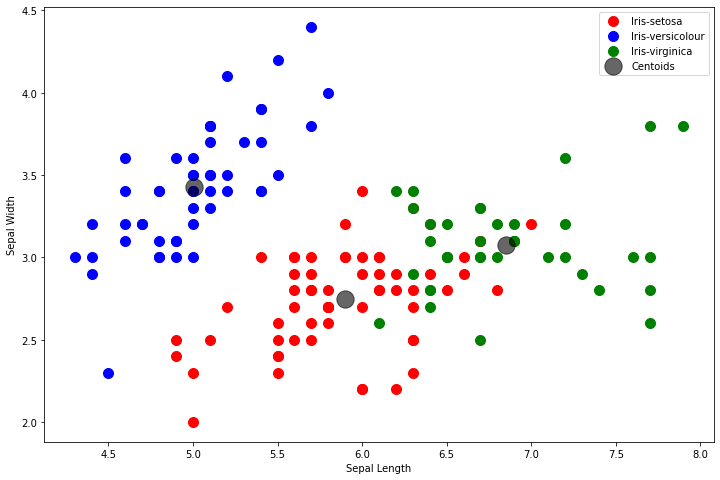

In [41]:
# visualize only on x 1st 2 columns info
# plot centroids also

plt.figure(figsize=(12,8))
plt.scatter(x[ymeans==0,0], x[ymeans==0,1], s=100, c='r', label='Iris-setosa')
plt.scatter(x[ymeans==1,0], x[ymeans==1,1], s=100, c='b', label='Iris-versicolour')
plt.scatter(x[ymeans==2,0], x[ymeans==2,1], s=100, c='g', label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=300,
            c='black',
            label='Centoids',
            alpha=0.6)
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

#### k-means clustering follows hard clustering i.e each point in our dataset can belong to only one cluster. 
#### it does not give the probability distribution of each point belonging to all clusters

#### 4. Use Gaussian Mixture

In [ ]:
# we know k means goal is minimize distortion measure
# gaussian mixture use k-independent gaussian distributions, but GM more flexible in shaping decision boundaries 
# so with GM there could be elliptical boundaries instead of K means circular boundaries

In [42]:
from sklearn.mixture import GaussianMixture

In [45]:
gmm_predict = GaussianMixture(n_components=3).fit_predict(x)

In [46]:
gmm_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

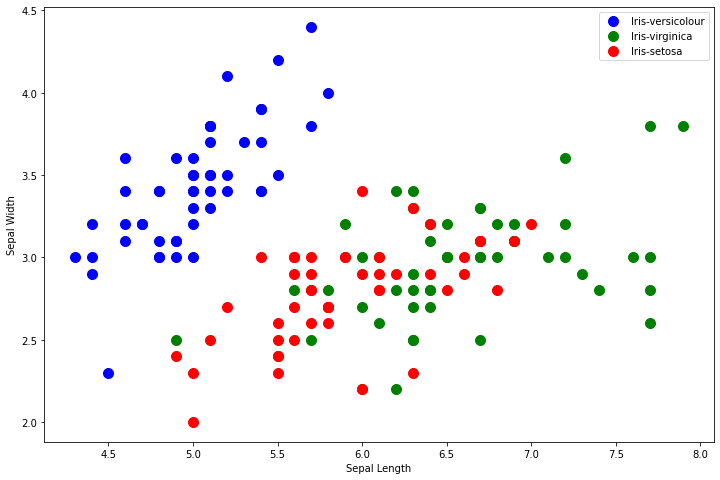

In [54]:
plt.figure(figsize=(12,8))
plt.scatter(x[gmm_predict==0,0], x[gmm_predict==0,1], s=100, c='b', label='Iris-versicolour')
plt.scatter(x[gmm_predict==1,0], x[gmm_predict==1,1], s=100, c='g', label='Iris-virginica')
plt.scatter(x[gmm_predict==2,0], x[gmm_predict==2,1], s=100, c='r', label='Iris-setosa')

plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width');

there's distinct difference in clustering between the virginica and setosa types when using GMM

#### 5. conclusion

to compare these clusters if they match the original labels: <br>

best way is to use an external cluster validation index such as the adjusted Rand score which generates a score between -1 and 1 (where an exact match will be scored as 1).

In [ ]:
# The Rand Index computes a similarity measure between two clusterings 
# by considering all pairs of samples and counting pairs that are assigned in the same or different clusters 
# in the predicted and true clusterings.